In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('D:\\self study\\Naresh IT\\Data Science\\12.Classification\\mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

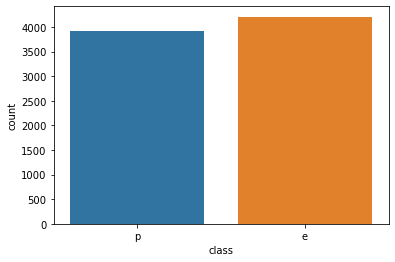

In [5]:
sns.countplot(data=df,x='class')

In [6]:
df.describe()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
df.describe().transpose()


,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [8]:
X= df.drop('class',axis=1)

In [9]:
X=pd.get_dummies(X,drop_first=True)
y=pd.get_dummies(df['class'],drop_first=True)

# train test split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=101,test_size=0.3)

# modelilng

In [12]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(X_train,y_train)

AdaBoostClassifier()

# prediction


In [13]:
train_prediction = ada.predict(X_train)
test_prediction = ada.predict(X_test)


## evaluation

In [14]:
# accuracy

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,train_prediction))
print(accuracy_score(y_test,test_prediction))

1.0
1.0


In [15]:
# cross validation score

from sklearn.model_selection import cross_val_score
score=cross_val_score(ada,X,y,cv=5)
print(score)

score.mean()

[0.84246154 1.         1.         1.         0.78325123]


0.9251425539977264

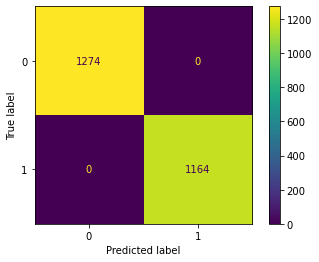

In [16]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(ada,X_test,y_test)

In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,test_prediction)

array([[1274,    0],
       [   0, 1164]], dtype=int64)

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test,test_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



# hyper parameter tuning

In [19]:
from sklearn.model_selection import GridSearchCV 

In [20]:
estimator= AdaBoostClassifier()

param_grid = {'n_estimators': list(range(1,100))}

hp=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
hp.fit(X_train,y_train)
hp.best_params_

{'n_estimators': 17}

# final model

In [21]:
ada= AdaBoostClassifier(n_estimators=17)
ada.fit(X_train,y_train)

test_prediction= ada.predict(X_test)
train_prediction = ada.predict(X_train)

print(accuracy_score(y_train,train_prediction))
print(accuracy_score(y_test,test_prediction))

score= cross_val_score(ada,X,y,cv=5)
print(score)
score.mean()


1.0
1.0
[0.89169231 0.99938462 0.99569231 1.         0.89655172]


0.9566641909814322

In [22]:
a=ada.feature_importances_
a

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05882353, 0.05882353, 0.05882353,
       0.        , 0.        , 0.11764706, 0.05882353, 0.        ,
       0.        , 0.        , 0.        , 0.11764706, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05882353, 0.        , 0.        , 0.        , 0.        ,
       0.05882353, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05882353, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [23]:
imp_feature=pd.DataFrame(index=X.columns,data=a,columns=['feature importance'])
imp_feature

,feature importance
cap-shape_c,0.0
cap-shape_f,0.0
cap-shape_k,0.0
cap-shape_s,0.0
cap-shape_x,0.0
...,...
habitat_l,0.0
habitat_m,0.0
habitat_p,0.0
habitat_u,0.0


In [24]:
imp_feature=imp_feature[imp_feature['feature importance']>0]
b=imp_feature.sort_values('feature importance')
b

,feature importance
bruises_t,0.058824
odor_c,0.058824
odor_f,0.058824
odor_p,0.058824
stalk-surface-above-ring_k,0.058824
stalk-surface-below-ring_y,0.058824
stalk-color-below-ring_n,0.058824
spore-print-color_r,0.058824
population_c,0.058824
odor_n,0.117647


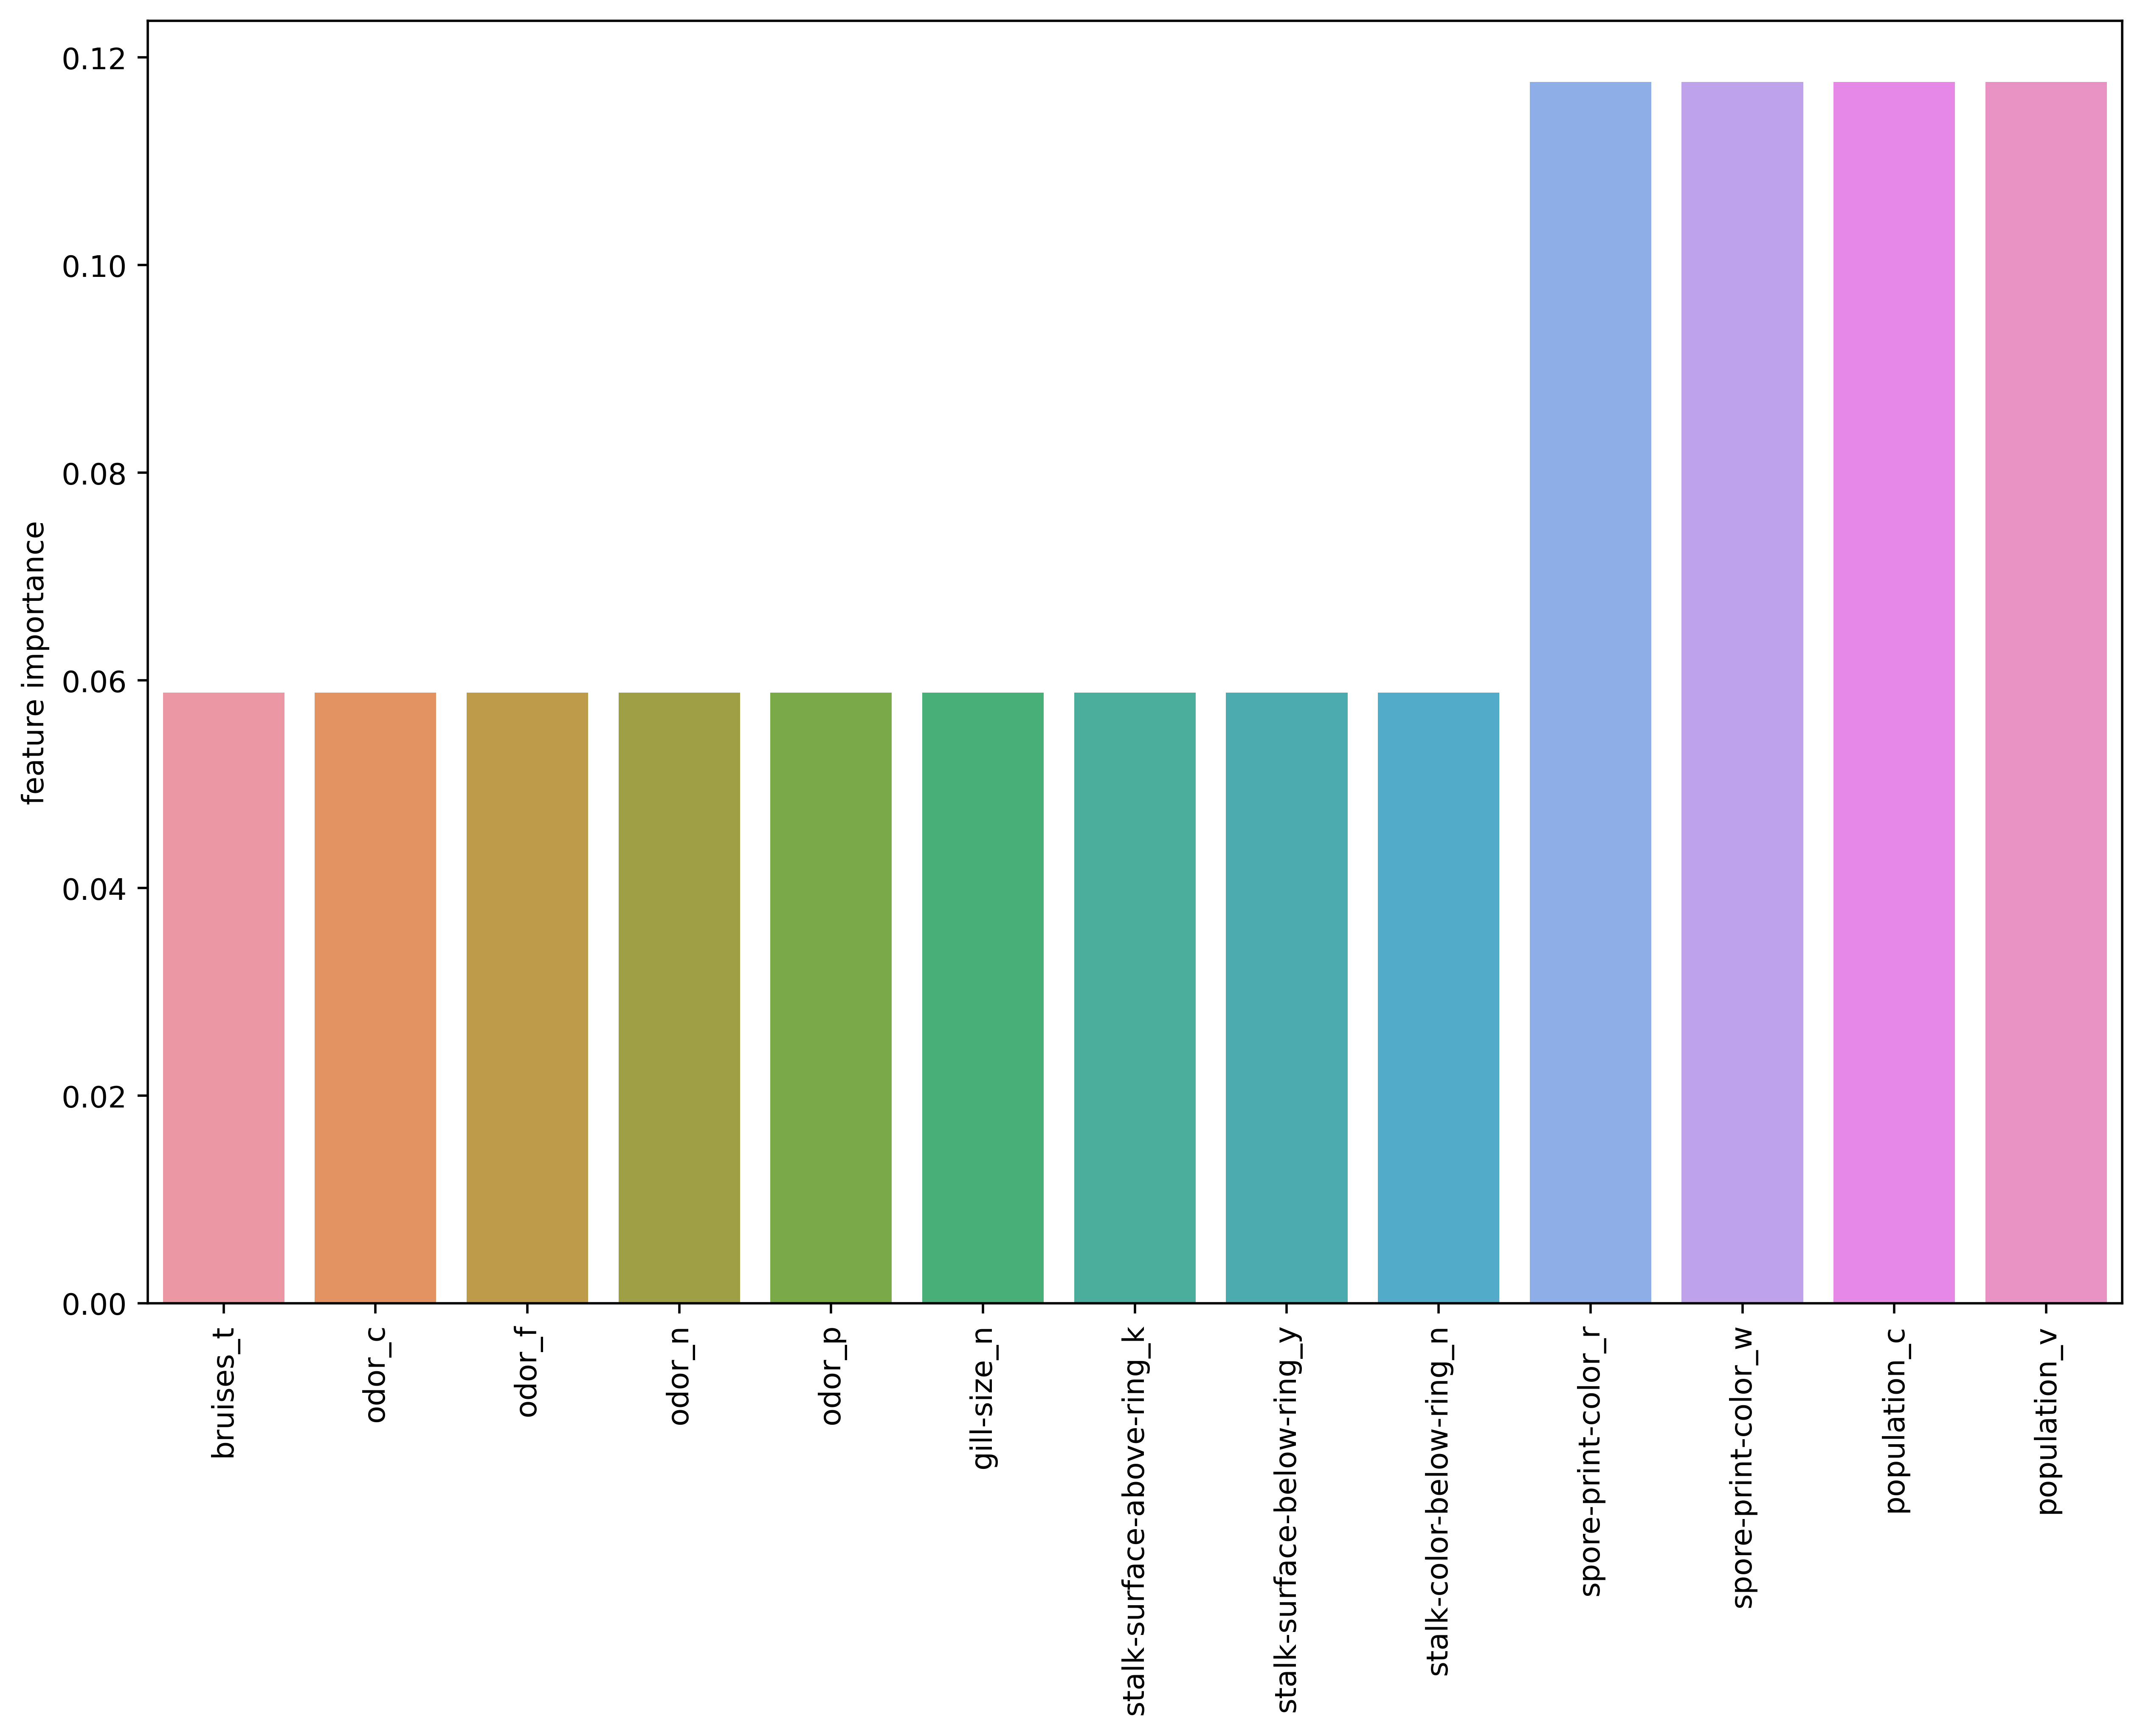

In [25]:
plt.figure(figsize=(12,8),dpi=(500))
sns.barplot(data=b,x=imp_feature.index,y='feature importance')
plt.xticks(rotation=90)
plt.show()